# Q1 and Q2

In [6]:
import pandas as pd
from math import log2

def equal_width_binning(data, column, bins=4):
    binned_data = pd.cut(data[column], bins=bins, labels=False, include_lowest=True)
    return binned_data

def calculate_entropy(data):
    # Calculate entropy of a dataset.
    value_counts = data.value_counts(normalize=True)
    entropy = -sum(p * log2(p) for p in value_counts if p > 0)
    return entropy

def calculate_gini_index(data):
    value_counts = data.value_counts(normalize=True)
    gini_index = 1 - sum(p ** 2 for p in value_counts)
    return gini_index

if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv("player_aggregated_stats.csv")

    # Specify numeric column for binning
    numeric_column = 'Dot Ball Percentage'

    # Apply equal width binning
    df['binned'] = equal_width_binning(df, numeric_column)

    # Calculate entropy
    entropy_value = calculate_entropy(df['binned'])
    print(f"Entropy of binned data: {entropy_value}")

    # Calculate Gini Index
    gini_value = calculate_gini_index(df['binned'])
    print(f"Gini Index of binned data: {gini_value}")

Entropy of binned data: 0.38618565995305965
Gini Index of binned data: 0.12747770143077541


# Q3

In [7]:
import numpy as np
import pandas as pd

def entropy(y):
    value_counts = y.value_counts(normalize=True)  # Get probability of each class
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))  # Prevent log(0)

def information_gain(df, feature, target):
    """Calculate Information Gain for a given feature."""
    total_entropy = entropy(df[target])  # Entropy before splitting

    # Compute weighted entropy after splitting by feature
    values = df[feature].unique()
    weighted_entropy = sum(
        (len(df[df[feature] == v]) / len(df)) * entropy(df[df[feature] == v][target])
        for v in values
    )

    return total_entropy - weighted_entropy  # Information Gain formula

def num_to_cat(df, target_column):
    
    df = df.copy()
    
    # Handle missing values
    df = df.dropna()  # Drop rows with missing values

    # Convert numerical features to categorical bins if needed
    for col in df.columns:
        if col != target_column and df[col].dtype in ['int64', 'float64']:
            df[col] = pd.qcut(df[col], q=4, duplicates='drop')  # Binning into quartiles

    return df

if __name__ == "__main__":
    # Load dataset
    try:
        df = pd.read_csv("player_aggregated_stats.csv")
    except FileNotFoundError:
        print("Error: File 'player_aggregated_stats.csv' not found.")
        exit()

    target_column = "Consistency Score"

    # Preprocess dataset
    df = num_to_cat(df, target_column)

    # Compute entropy of the dataset
    H_S = entropy(df[target_column])
    print(f"\nEntropy of '{target_column}': {H_S:.4f}\n")

    # Compute Information Gain for each feature
    features = [col for col in df.columns if col != target_column]
    info_gains = {feature: information_gain(df, feature, target_column) for feature in features}

    # Sort features by highest Information Gain
    sorted_ig = sorted(info_gains.items(), key=lambda x: x[1], reverse=True)

    # Display results
    print("Information Gain for each feature (sorted):")
    for feature, ig in sorted_ig:
        print(f"{feature}: {ig:.4f}")
    
    # Identify the best feature for the root node
    best_feature = sorted_ig[0][0] if sorted_ig else None
    print(f"\n The best root node feature is: '{best_feature}'")



Entropy of 'Consistency Score': 8.3187

Information Gain for each feature (sorted):
Player: 7.4957
Team: 2.6232
Role_y: 1.8669
Venue: 1.3362
Season: 0.9403
Rolling Economy Rate: 0.7150
Economy Rate: 0.6732
Bowling Economy vs Team: 0.6732
Role_x: 0.6611
Runs Scored: 0.5870
Balls Faced: 0.5770
Performance vs Team: 0.5645
Strike Rate: 0.5642
Rolling Strike Rate: 0.5427
Opponent: 0.4822
Dot Ball Percentage: 0.3021
Phase: 0.1603
Match Result: 0.1098
Wickets Taken: 0.0000

 The best root node feature is: 'Player'


# Q4

In [8]:
import pandas as pd


def binning(df, column, bins=4, binning_type='equal-width'):
    df = df.copy()

    if binning_type == 'equal-width':
        df[column + "_equal_width"] = pd.cut(df[column], bins=bins, labels=False, duplicates='drop')
    elif binning_type == 'equal-frequency':
        df[column + "_equal_freq"] = pd.qcut(df[column], q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning type. Choose 'equal-width' or 'equal-frequency'.")

    return df

if __name__ == "__main__":
    # Load dataset
    try:
        df = pd.read_csv("player_aggregated_stats.csv")
    except FileNotFoundError:
        print("Error: File 'player_aggregated_stats.csv' not found.")
        exit()

    target_column = "Consistency Score"

    # Identify numerical features (excluding the target column)
    numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != target_column]

    # Apply equal-width binning and print bins
    print("\nEqual-Width Binning Results:")
    for feature in numerical_features:
        df = binning(df, column=feature, bins=4, binning_type='equal-width')
        print(df[[feature, feature + "_equal_width"]].head(10))  # Print first 10 rows for comparison

    # Apply equal-frequency binning and print bins
    print("\nEqual-Frequency Binning Results:")
    for feature in numerical_features:
        df = binning(df, column=feature, bins=4, binning_type='equal-frequency')
        print(df[[feature, feature + "_equal_freq"]].head(10))  # Print first 10 rows for comparison



Equal-Width Binning Results:
   Runs Scored  Runs Scored_equal_width
0         39.0                        0
1         19.0                        0
2         13.0                        0
3         49.0                        1
4         10.0                        0
5         21.0                        0
6         21.0                        0
7         19.0                        0
8         13.0                        0
9          9.0                        0
   Balls Faced  Balls Faced_equal_width
0         14.0                        0
1         14.0                        0
2         11.0                        0
3         26.0                        0
4          3.0                        0
5         14.0                        0
6         12.0                        0
7         11.0                        0
8          7.0                        0
9          9.0                        0
   Strike Rate  Strike Rate_equal_width
0       278.57                        1
1       13

# Q5

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("player_aggregated_stats.csv")

# Define target column
target_column = "Consistency Score"

# Keep only numerical features (int and float),
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != target_column]
df = df[numerical_features + [target_column]] 

df = binning(df, column=target_column, bins=4, binning_type='equal-frequency')

# Use the binned version of `Consistency Score`
binned_target_column = f"{target_column}_equal_freq"
X = df.drop(columns=[target_column, binned_target_column])  # Keep only numeric features
y = df[binned_target_column]  # Use binned target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predictions & Accuracy
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")



Decision Tree Accuracy: 0.4571


# Q6

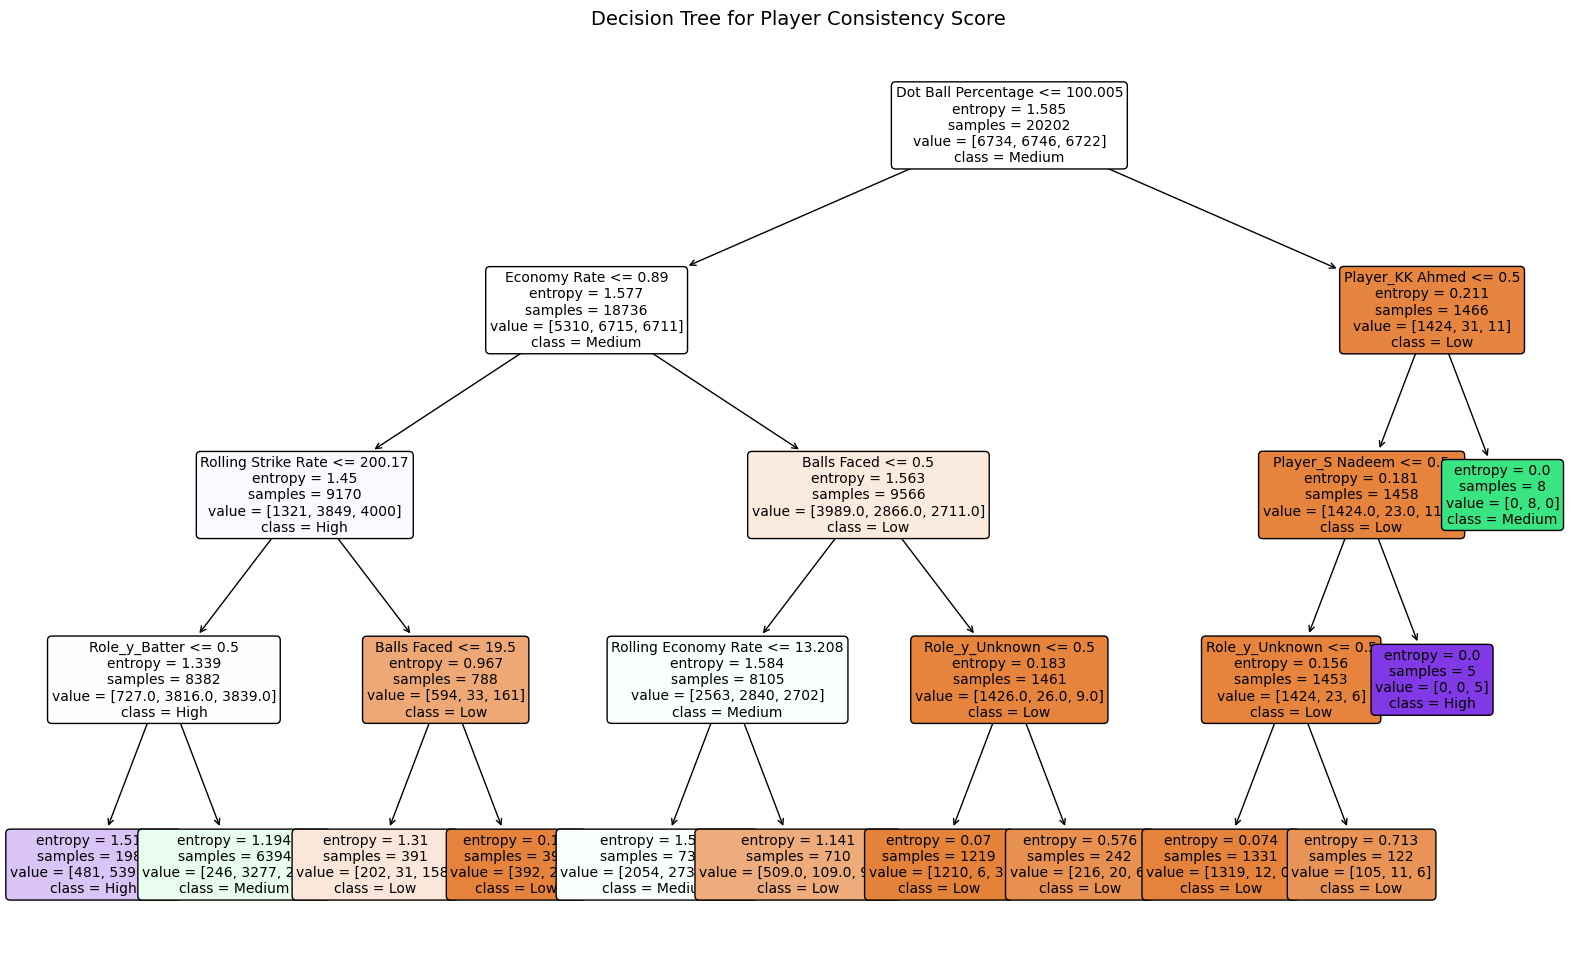

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset
df = pd.read_csv("player_aggregated_stats.csv")

# Define target column
target_column = "Consistency Score"

# Convert numerical target into categorical bins (e.g., "Low", "Medium", "High")
df[target_column] = pd.qcut(df[target_column], q=3, labels=["Low", "Medium", "High"])

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure target column is not in numerical_features
if target_column in numerical_features:
    numerical_features.remove(target_column)

# Convert categorical features using one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)  

# Get the updated feature list
features = [col for col in df.columns if col != target_column]

# Train Decision Tree Classifier (with a limited depth for readability)
clf = DecisionTreeClassifier(max_depth=4, criterion="entropy")  # Try `max_depth=3` if still too complex
clf.fit(df[features], df[target_column])

# Plot the tree with better readability
plt.figure(figsize=(20, 12))  # Increase size for better visualization
plot_tree(
    clf, 
    feature_names=features, 
    class_names=["Low", "Medium", "High"], 
    filled=True, 
    rounded=True, 
    fontsize=10  # Adjust font size for readability
)

plt.title("Decision Tree for Player Consistency Score", fontsize=14)
plt.show()


# Q7

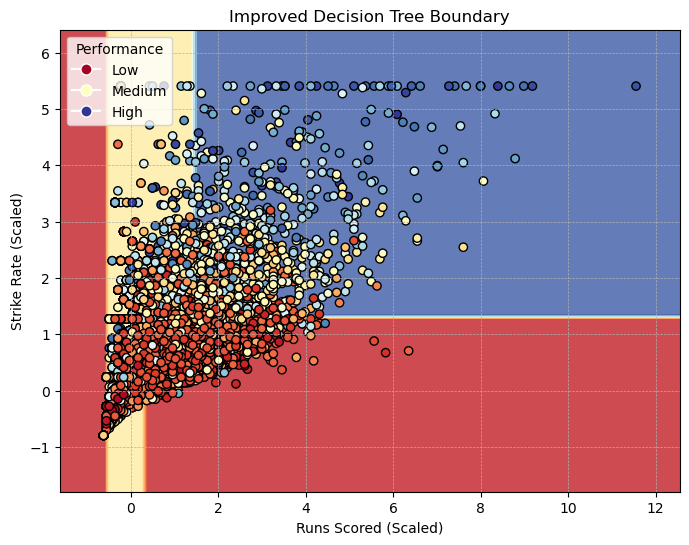

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

# Load dataset (Replace with actual file)
df = pd.read_csv("player_aggregated_stats.csv")

# Select 2 features for classification
features = ["Runs Scored", "Strike Rate"]
target_column = "Consistency Score"  # Adjust according to your dataset

# 🔍 Ensure Strike Rate is Valid
df["Strike Rate"] = df["Strike Rate"].clip(0, 600)  # No negative or extreme values
df.dropna(subset=features + [target_column], inplace=True)

# Convert categorical target if necessary
df[target_column] = df[target_column].astype("category").cat.codes

# Standardize the features for better separation
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Train a Decision Tree with controlled depth
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
clf.fit(df[features], df[target_column])

# Define plot boundaries
fig, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    clf, df[features], cmap=plt.cm.RdYlBu, response_method="predict", ax=ax, alpha=0.8
)

# Scatter plot of actual data points
scatter = ax.scatter(
    df[features[0]], df[features[1]], c=df[target_column], cmap=plt.cm.RdYlBu, edgecolor="black"
)

# Improve plot aesthetics
ax.set_xlabel("Runs Scored (Scaled)")
ax.set_ylabel("Strike Rate (Scaled)")
ax.set_title("Improved Decision Tree Boundary")
ax.grid(True, linestyle="--", linewidth=0.5)

# Add clear legend
legend_labels = {0: "Low", 1: "Medium", 2: "High"}
handles = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=plt.cm.RdYlBu(i / 2), markersize=8)
    for i in range(3)
]
plt.legend(handles, legend_labels.values(), title="Performance", loc="upper left")

plt.show()
